In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv


In [2]:
df = pd.read_csv(r"/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv")

# **DATA PRE-PROCESSING**

In [3]:
df.head()
df.tail()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [4]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [5]:
df['Date_Time'] = pd.to_datetime(df['Datum']) #converting format to date and time

df['Year'] = df['Date_Time'].apply(lambda datetime: datetime.year) #extracting the years for launch

df["Country"] = df["Location"].apply(lambda location: location.split(", ")[-1]) #extracting countries for launch

In [6]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Date_Time,Year,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,USA


In [7]:
df = df.drop(columns=['Location', 'Datum'])

# **VISUALIZATION **

Text(0.5, 1.0, 'Company v/s Launches')

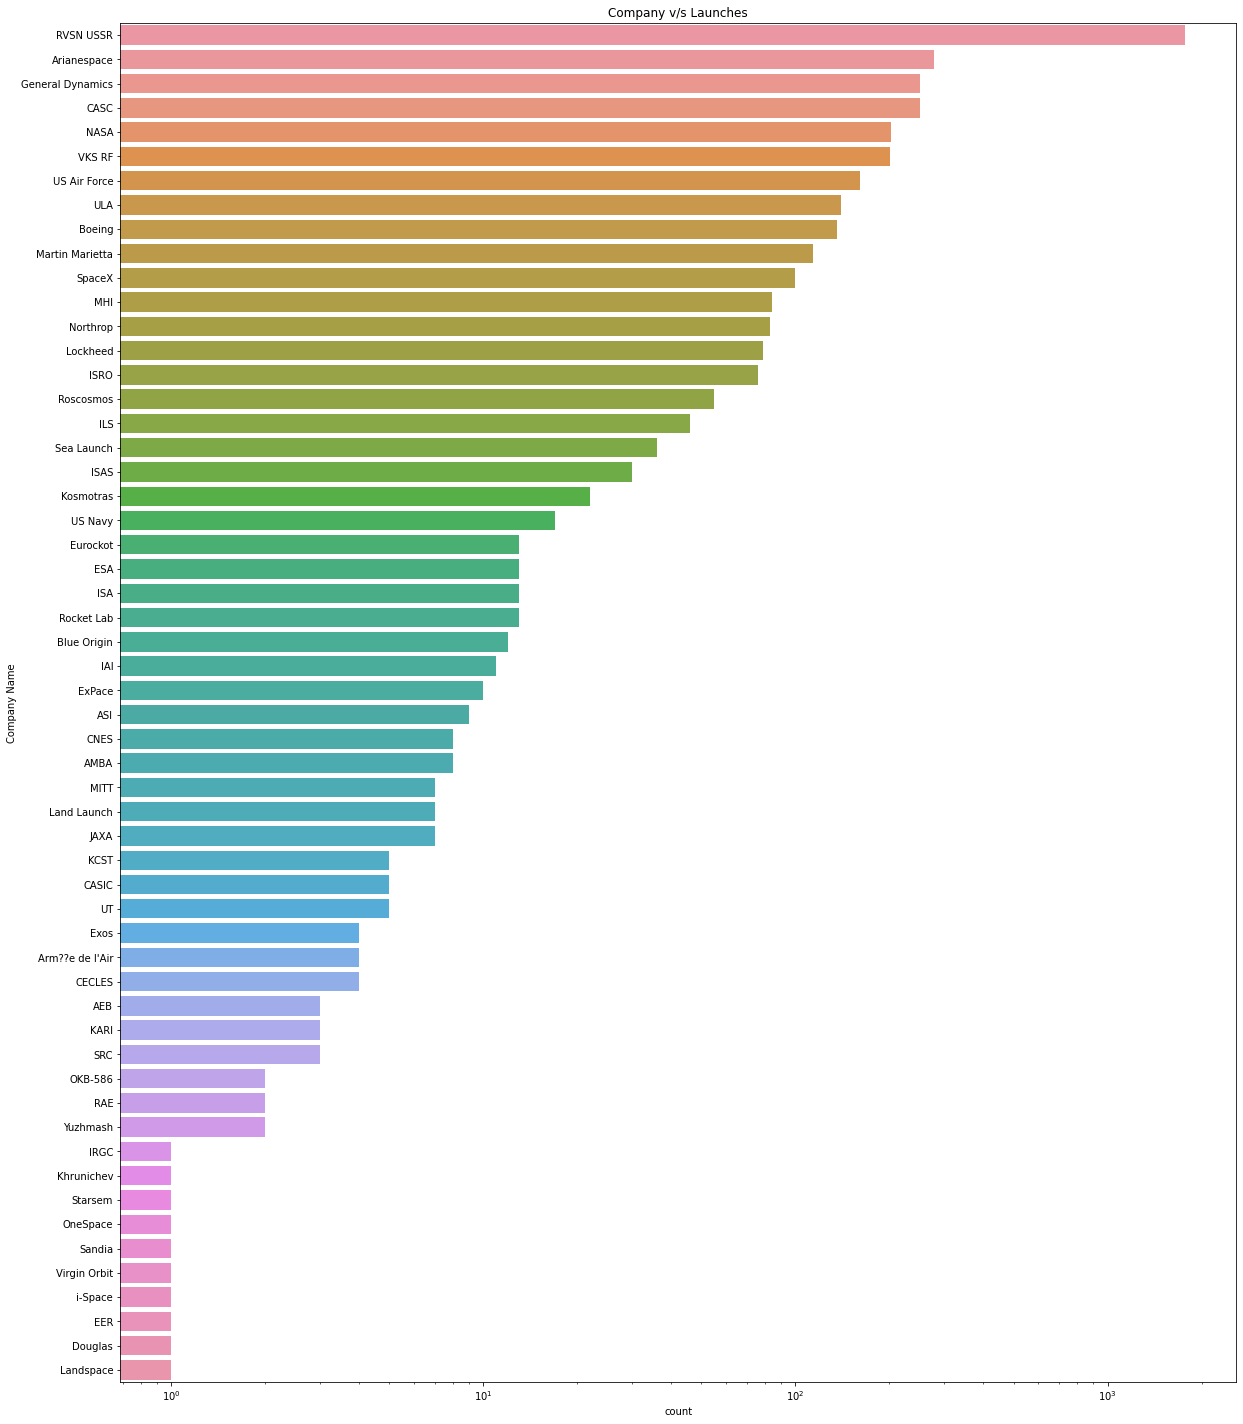

In [8]:
fig_dims = (20, 25)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set(xscale="log")
sns.countplot(y="Company Name",data=df, order = df["Company Name"].value_counts().index).set_title('Company v/s Launches')

Text(0.5, 1.0, 'Country v/s Launches')

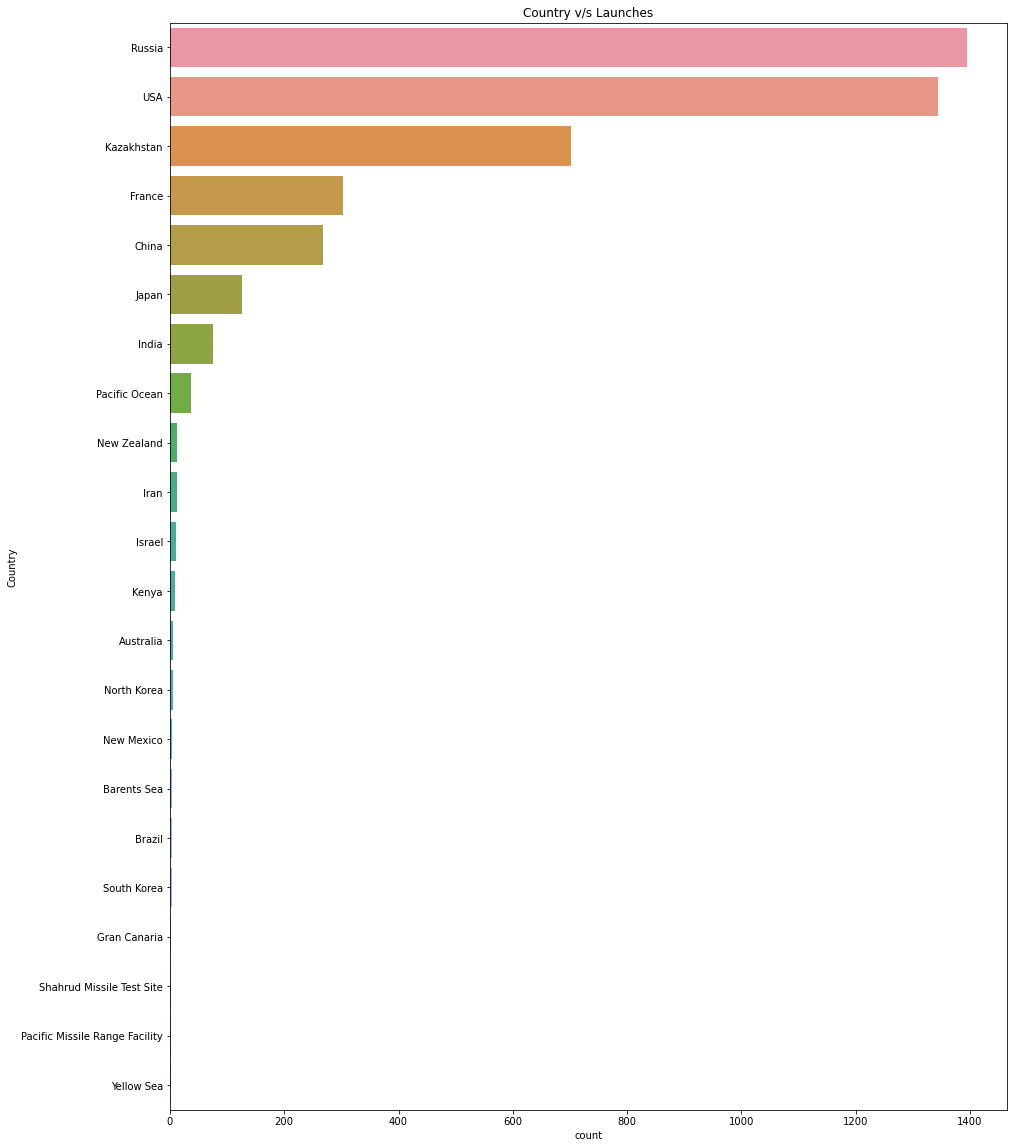

In [9]:
fig_dims = (15, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y="Country",data=df, order = df["Country"].value_counts().index).set_title('Country v/s Launches')

Text(0.5, 1.0, 'Year v/s Launches')

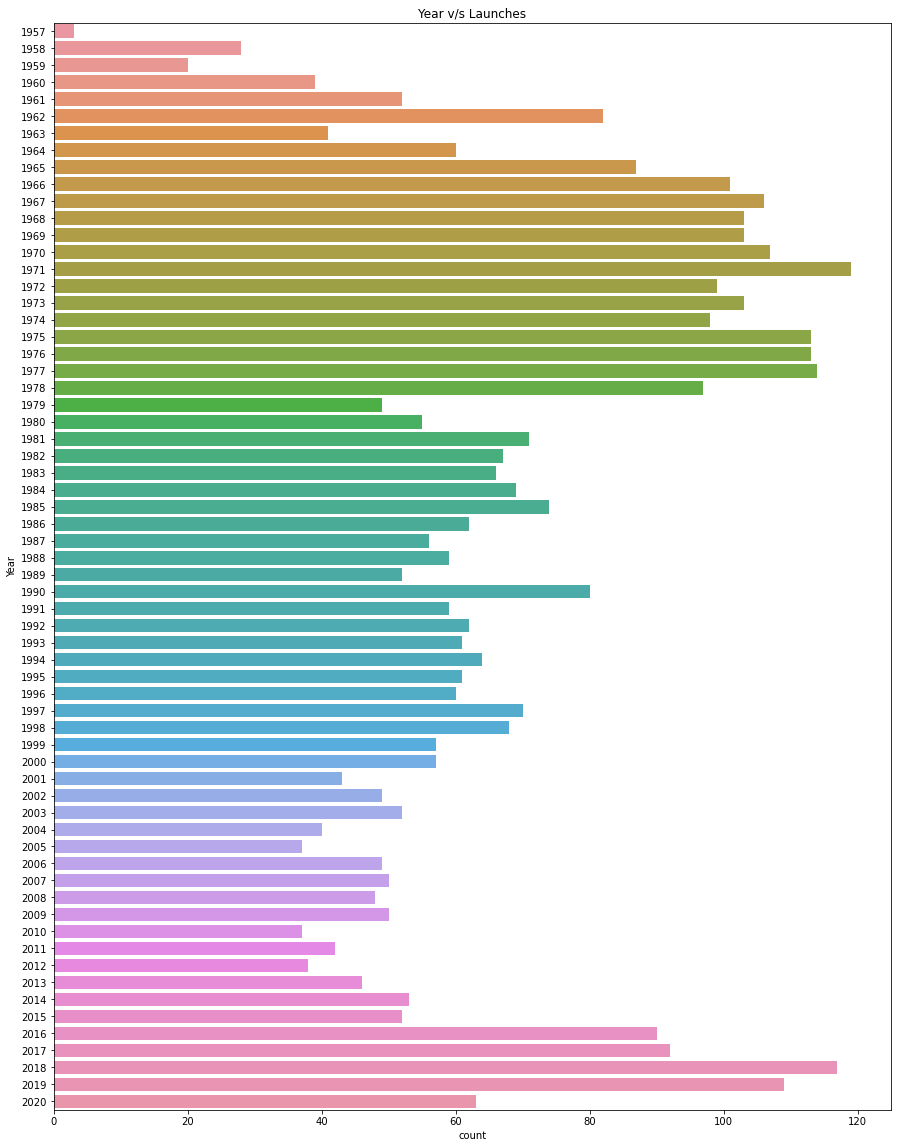

In [10]:
fig_dims = (15, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y="Year",data=df).set_title('Year v/s Launches')

Text(0.5, 1.0, 'Mission Status')

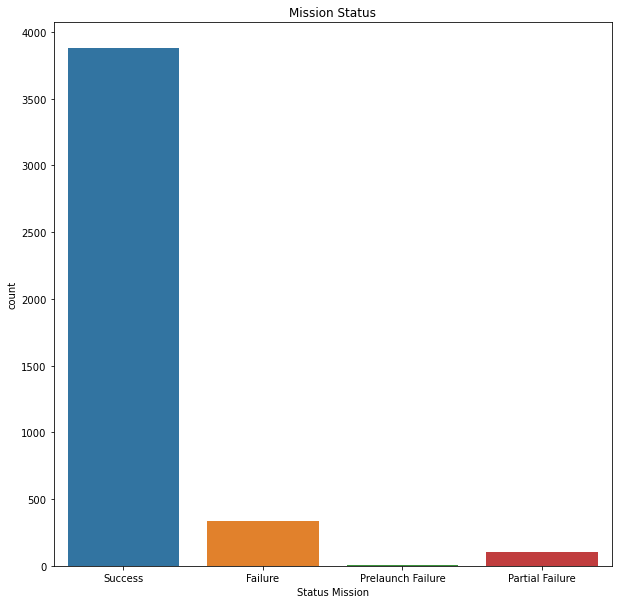

In [11]:
fig_dims = (10,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Status Mission",data=df).set_title('Mission Status')

Text(0.5, 1.0, 'Rocket Status')

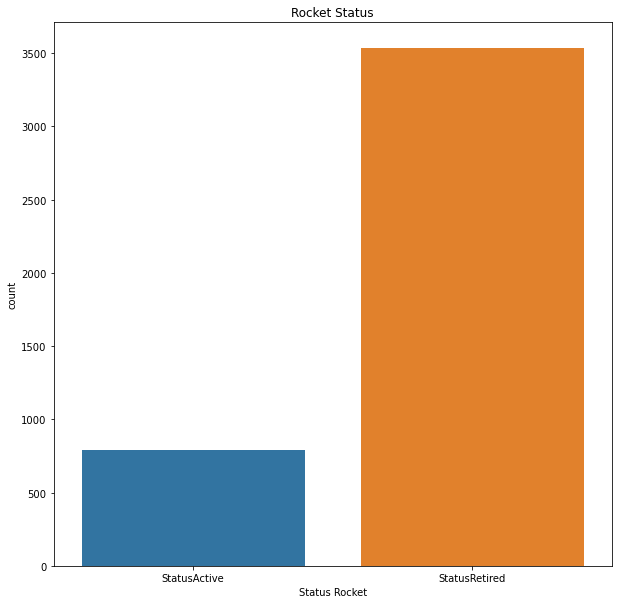

In [12]:
fig_dims = (10,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Status Rocket",data=df).set_title('Rocket Status')